# Strategy to group Engineering Colleges


# Import Libraries and load data

In [1]:
import numpy as np
import pandas as pd

In [ ]:
#skip this when running on your workstation otherwise delete
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#skip this when running on your workstation otherwise delete
# import os
# FILE_PATH = '/content/drive/MyDrive/PES/ML3/Session-2'
# os.chdir (FILE_PATH)

In [2]:
df=pd.read_csv('Engg_College_Data.csv')

# Checking the data

In [4]:
df.head()

,SR_NO,Engg_College,Teaching,Fees,Placements,Internship,Infrastructure
0,1,A,5,2,5,5,3
1,2,B,4,2,5,5,3
2,3,C,4,5,5,4,5
3,4,D,5,4,5,4,4
4,5,E,2,5,2,2,5


In [5]:
df.shape

(26, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   SR_NO           26 non-null     int64 
 1   Engg_College    26 non-null     object
 2   Teaching        26 non-null     int64 
 3   Fees            26 non-null     int64 
 4   Placements      26 non-null     int64 
 5   Internship      26 non-null     int64 
 6   Infrastructure  26 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.6+ KB


# Get the count of unique values for Engg_College

In [7]:
df.Engg_College.nunique()

26

# Get the unique values for Engg_College

In [8]:
df.Engg_College.unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
      dtype=object)

# Checking the Summary Statistic

In [9]:
df.describe()

,SR_NO,Teaching,Fees,Placements,Internship,Infrastructure
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,13.500000,2.807692,3.576923,2.884615,2.769231,3.384615
std,7.648529,1.132051,1.331858,1.531716,1.242826,1.298520
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,7.250000,2.000000,2.250000,1.250000,2.000000,3.000000
50%,13.500000,3.000000,4.000000,3.000000,2.000000,3.000000
75%,19.750000,3.000000,5.000000,4.000000,4.000000,4.750000
max,26.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [10]:
enggdata = df.iloc[:,1:7]

In [11]:
enggdata.head()

,Engg_College,Teaching,Fees,Placements,Internship,Infrastructure
0,A,5,2,5,5,3
1,B,4,2,5,5,3
2,C,4,5,5,4,5
3,D,5,4,5,4,4
4,E,2,5,2,2,5


# Creating the Dendrogram
### Importing dendrogram and linkage module

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage

### Choosing average linkage method

In [13]:
link_method = linkage(enggdata.iloc[:,2:7], method = 'average')

In [14]:
labelList = np.array(enggdata.Engg_College)
labelList

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
      dtype=object)

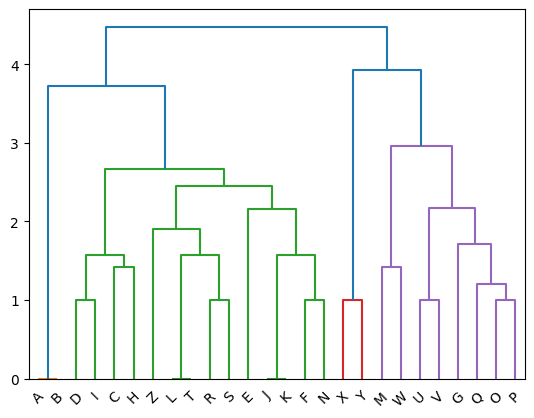

In [15]:
dend = dendrogram(link_method,labels = labelList, truncate_mode=None)

### Cutting the Dendrogram with suitable clusters

truncate_mode='lastp'
This is the most commonly used mode. It tells SciPy to only show the last p clusters formed during the merging process

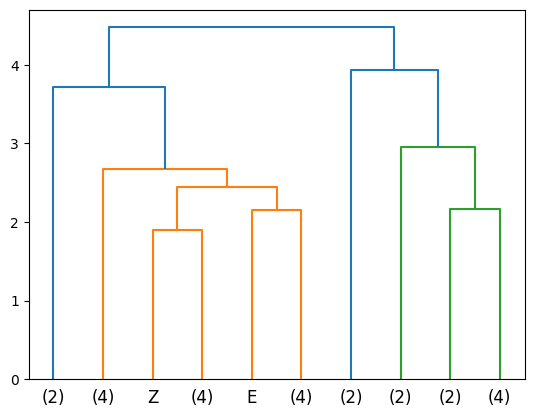

In [16]:
dend = dendrogram(link_method,
                 truncate_mode='lastp',
                 p = 10,
                 labels = labelList
                 )

# Importing fcluster module to create clusters

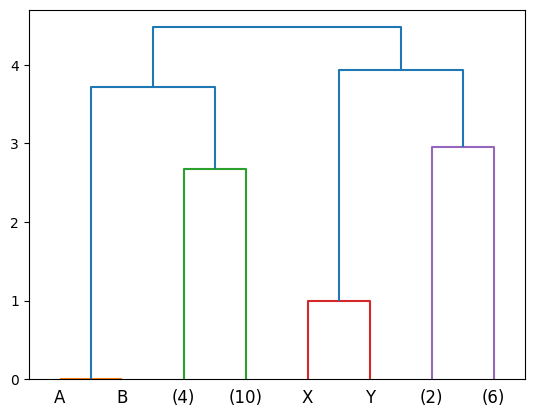

In [17]:
dend = dendrogram(link_method,
                 truncate_mode='level',
                 p = 2,
                 labels = labelList
                 )

In [18]:
from sklearn.cluster import AgglomerativeClustering

In [19]:
model = AgglomerativeClustering(n_clusters=3, linkage='average')

In [20]:
labels = model.fit_predict(enggdata.iloc[:,2:7])

In [21]:
labels

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 2, 2, 0])

Appending clusters to original dataset

In [22]:
df['clusters'] =labels

In [23]:
df.head(26)

,SR_NO,Engg_College,Teaching,Fees,Placements,Internship,Infrastructure,clusters
0,1,A,5,2,5,5,3,0
1,2,B,4,2,5,5,3,0
2,3,C,4,5,5,4,5,0
3,4,D,5,4,5,4,4,0
4,5,E,2,5,2,2,5,0
5,6,F,3,4,3,3,4,0
6,7,G,1,3,1,1,2,1
7,8,H,4,4,5,5,5,0
8,9,I,4,4,4,4,4,0
9,10,J,3,4,3,4,5,0


### Cluster Frequency

In [24]:
df.clusters.value_counts().sort_index()

clusters
0    16
1     8
2     2
Name: count, dtype: int64

# Cluster Profiles

In [25]:
aggdata=df.iloc[:,2:8].groupby('clusters').mean()
aggdata['Freq']=df.clusters.value_counts().sort_index()
aggdata

,Teaching,Fees,Placements,Internship,Infrastructure,Freq
clusters,,,,,,
0,3.375,4.125,3.875,3.4375,3.875,16
1,2.125,3.125,1.375,1.7500,2.000,8
2,1.000,1.000,1.000,1.5000,5.000,2


In [26]:
df[df['clusters']==0]

,SR_NO,Engg_College,Teaching,Fees,Placements,Internship,Infrastructure,clusters
0,1,A,5,2,5,5,3,0
1,2,B,4,2,5,5,3,0
2,3,C,4,5,5,4,5,0
3,4,D,5,4,5,4,4,0
4,5,E,2,5,2,2,5,0
5,6,F,3,4,3,3,4,0
7,8,H,4,4,5,5,5,0
8,9,I,4,4,4,4,4,0
9,10,J,3,4,3,4,5,0
10,11,K,3,4,3,4,5,0


- Cluster 1: Tier 1 colleges (Top Colleges)
- Cluster 2: Tier 3 colleges (Poor performing colleges/new college)
- Cluster 3: Tier 2 colleges (Medium performing colleges)

# Recommendations
1. For companies hiring, go to colleges for Placements are Tier 1 colleges, followed by Tier 2 colleges
2. For companies providing Training program to staffs and students, go to colleges are Tier 2 and Tier 3 Colleges, since Tier 1 is comparitively performing better.
3. Tier 3 colleges will need to concentrate more on Marketing and Advertisements about their campus to create awareness and attract students
4. Students looking to enroll in a college, can give priority to Tier 1 over Tier 2 and 3 colleges

# Saving the Cluster Profiles in a csv file

In [27]:
#aggdata.to_csv('enggdata_hc.csv')

In [28]:
from scipy.cluster.hierarchy import cophenet

In [29]:
cophe_dists =cophenet(link_method)

In [30]:
from scipy.spatial.distance import pdist

In [31]:
orign_dists = pdist(enggdata.iloc[:,1:6])

In [32]:
corr_coef = np.corrcoef(orign_dists, cophe_dists)[0,1]

In [33]:
corr_coef

np.float64(0.7355932942866455)

In [36]:
methods=["single", "ward", "complete", "average", 'centroid']

In [37]:
for method in methods:
  link_method_m= linkage(enggdata.iloc[:,1:6], method = method)
  cophe_dists_m =cophenet(link_method_m)
  corr_coef_m = np.corrcoef(orign_dists, cophe_dists_m)[0,1]
  print (f"for {method} linkage method, the coefficient is {corr_coef_m}")


for single linkage method, the coefficient is 0.6680763440656516
for ward linkage method, the coefficient is 0.701319810168756
for complete linkage method, the coefficient is 0.5999049006562711
for average linkage method, the coefficient is 0.7299512652344652
for centroid linkage method, the coefficient is 0.7342990870225201


When you perform hierarchical clustering, you are taking a high-dimensional set of points and forcing them into a tree structure (dendrogram)

Original Distance: The actual Euclidean (or other) distance between point i and j

Cophenetic Distance: The height in the dendrogram where point i and  j first "meet" in the same cluster.

The Cophenetic Correlation is the correlation between these two sets of distances

Correlation Score,Interpretation
0.9 - 1.0,Excellent fit; the dendrogram is very reliable.

0.6 - 0.8,Good fit--> typical result.

< 0.6,Poor fit; hierarchical clustering might not be the right tool for this dataset.